<a href="https://colab.research.google.com/github/hanene2030/numpy/blob/main/9_fourier_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Complex number

In [1]:
imag = 1j
imag ** 2

(-1+0j)

In [2]:
complex_number = 3 + 2j

In [3]:
complex_number * imag

(-2+3j)

In [4]:
import numpy as np
complex_vec = np.array([imag, complex_number])
complex_vec

array([0.+1.j, 3.+2.j])

In [5]:
complex_vec.real

array([0., 3.])

In [6]:
complex_vec.imag

array([1., 2.])

In [7]:
np.abs(complex_vec)

array([1.        , 3.60555128])

In [8]:
complex_number.real, complex_number.imag

(3.0, 2.0)

In [9]:
abs(complex_number)

3.605551275463989

In [10]:
complex_vec.dtype

dtype('complex128')

# Fourier Transform

In [11]:
#1D discrete fourier transform
from numpy import fft



In [12]:
num_samples = 400
samples_freq = 1/200
times = np.linspace(0, samples_freq* num_samples,num_samples )

In [13]:
simple_signal = np.sin(20* np.pi*times)

In [14]:
import matplotlib.pyplot as plt


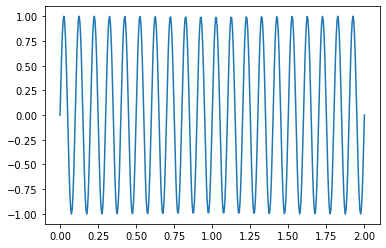

In [15]:
plt.plot(times, simple_signal);

In [16]:
F_f = fft.rfft(simple_signal)
frequency_domain = fft.rfftfreq(num_samples, samples_freq)


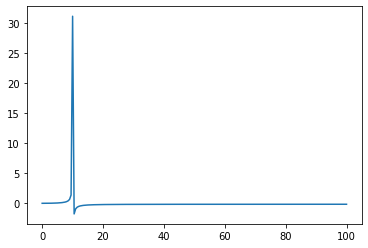

In [17]:
plt.plot(frequency_domain, F_f.real)

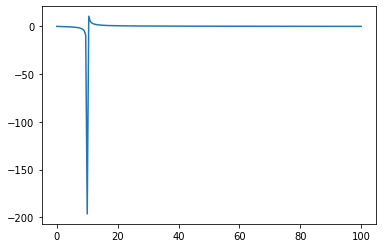

In [18]:
plt.plot(frequency_domain, F_f.imag)

In [19]:
tow_signal = np.sin(100 * np.pi * times) + np.sin(40 * np.pi * times)

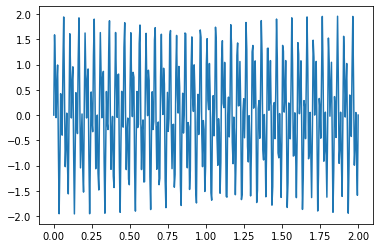

In [20]:
plt.plot(times, tow_signal)

In [21]:
F_f_2 = fft.rfft(tow_signal)

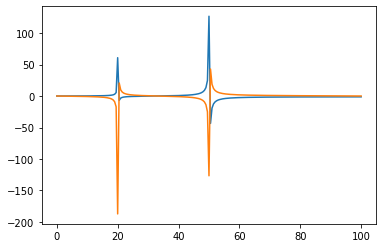

In [22]:
plt.plot(frequency_domain, F_f_2.real)
plt.plot(frequency_domain, F_f_2.imag)

In [23]:
F_f_2[frequency_domain > 35] = 0

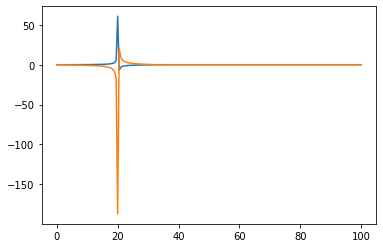

In [24]:
plt.plot(frequency_domain, F_f_2.real)
plt.plot(frequency_domain, F_f_2.imag)

In [25]:
lower_freq = fft.irfft(F_f_2)  #inverse real fourier transformer

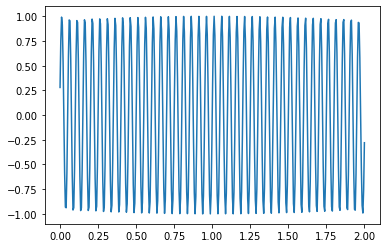

In [26]:
plt.plot(times, lower_freq)

# Smoothing a Signal 

In [27]:
times = np.linspace(0, 2, 600)

In [28]:
signal = np.exp(-np.cos(30* np.pi * times)) * (np.cos(10 * np.pi * times) + np.sin(100 * np.pi * times))

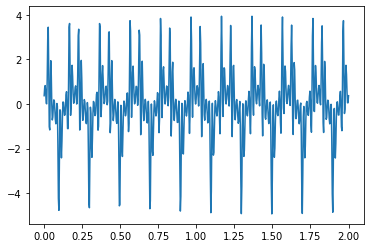

In [29]:
plt.plot(times, signal);

In [30]:
F_f_3 = fft.rfft(signal)
frequency_domain_3 = fft.rfftfreq(600, 1/300)

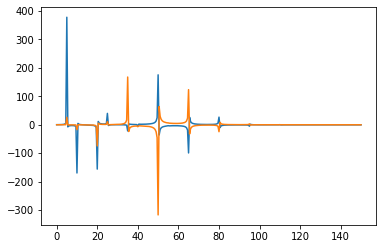

In [31]:
plt.plot(frequency_domain_3, F_f_3.real)
plt.plot(frequency_domain_3, F_f_3.imag);

In [32]:
F_f_3[frequency_domain_3 > 40] = 0

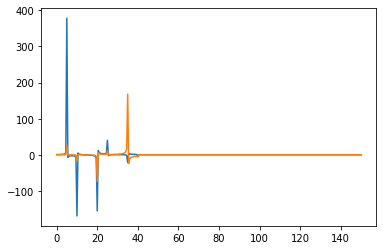

In [33]:
plt.plot(frequency_domain_3, F_f_3.real)
plt.plot(frequency_domain_3, F_f_3.imag);

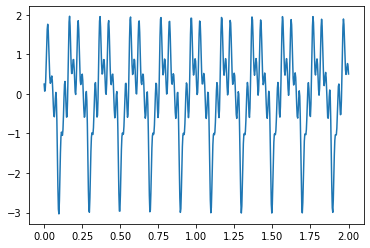

In [34]:
smooth_signal = fft.irfft(F_f_3)
plt.plot(times, smooth_signal)

# 2D Fourier transform

In [35]:
from skimage.data import  camera
camera = camera()

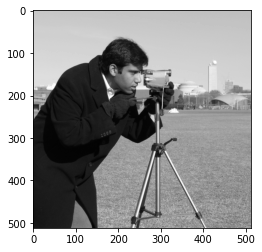

In [36]:
plt.imshow(camera, cmap=plt.cm.gray);

In [37]:
camera.shape

(512, 512)

In [38]:
F_camera = fft.rfft2(camera)

In [39]:
F_camera

array([[ 3.38324950e+07+0.00000000e+00j,  1.46776330e+04+6.37922066e+06j,
         3.31922363e+05+1.53194046e+06j, ...,
        -1.29753026e+04+1.49953896e+03j, -8.94032461e+03+4.75530925e+03j,
        -2.60530000e+04+0.00000000e+00j],
       [ 4.94699785e+06-4.04887913e+06j, -1.26099790e+06-4.82137610e+06j,
        -2.31216026e+06-3.01125892e+05j, ...,
         3.53483567e+03-2.30715519e+04j,  5.58618019e+03-1.35697118e+03j,
        -1.28616899e+04-1.82754281e+04j],
       [-1.48692366e+06-2.41932478e+06j, -6.66793200e+05-6.35526475e+05j,
        -1.51800922e+06+8.92235152e+05j, ...,
         4.19469822e+03+8.68285360e+03j, -1.01136604e+04-2.26942064e+03j,
         1.16738686e+04-6.47151939e+03j],
       ...,
       [ 6.51631768e+05+1.09450568e+06j,  4.27643438e+05-2.30262422e+05j,
         2.81362961e+05+8.48986214e+05j, ...,
         1.96432807e+03+8.75493703e+02j,  1.98010267e+03+9.61480893e+03j,
        -5.88633533e+03+9.32785054e+03j],
       [-1.48692366e+06+2.41932478e+06j,  5.

In [40]:
log = np.log(1 + np.abs(F_camera)) / np.log(1 + np.abs(F_camera).max())

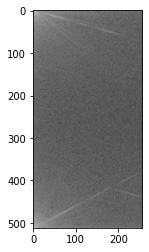

In [41]:
plt.imshow(log, cmap=plt.cm.gray);

In [42]:
np.count_nonzero(F_camera)

131584

In [43]:
F_camera[np.abs(F_camera) < 10000 ] = 0

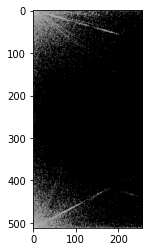

In [44]:
log = np.log(1 + np.abs(F_camera)) / np.log(1 + np.abs(F_camera).max())
plt.imshow(log, cmap=plt.cm.gray);


In [45]:
np.count_nonzero(F_camera)

15886

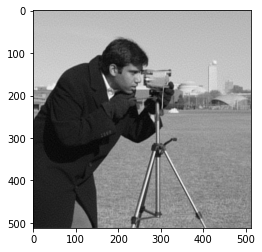

In [46]:
compressed = fft.irfft2(F_camera)
plt.imshow(compressed  , cmap=plt.cm.gray);